In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
sns.set_style('darkgrid')

In [2]:
#read production dataset
prod_data = pd.read_csv('Africa Food Production.csv')
prod_data.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [21]:
#convert 'Year' column to dateObjects
prod_data['Year'] = pd.to_datetime(prod_data['Year'], format = '%Y')

In [3]:
#read the supply dataset
supply_data = pd.read_csv('Africa Food Supply.csv')
supply_data.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [31]:
#convert 'Year' column to dateObjects
supply_data['Year'] = pd.to_datetime(supply_data['Year'], format='%Y')

## Visualizations

**Viz 1:Trends in Food Production (2004-2013)**

Text(0, 0.5, 'Value (kt)')

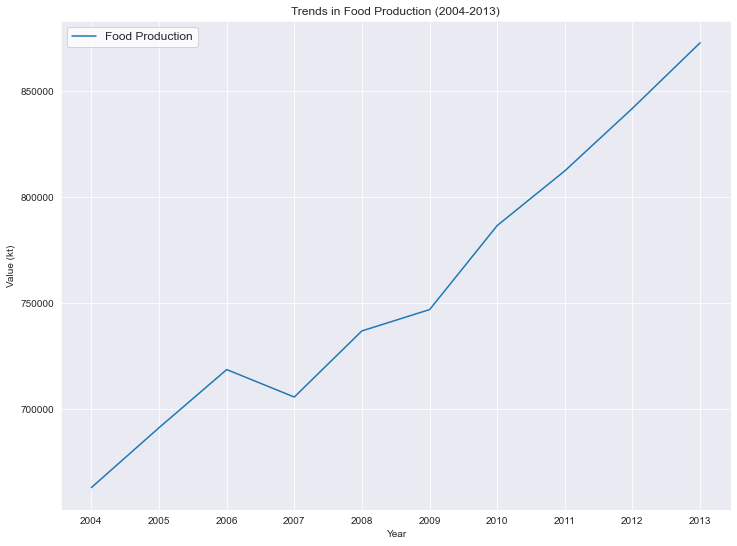

In [131]:
plt.figure(figsize=(12,9))
plt.plot(prod_data.groupby('Year').sum(), label='Food Production')
plt.legend(loc='upper left', fontsize='large', facecolor='white')
plt.title('Trends in Food Production (2004-2013)')
plt.xlabel('Year')
plt.ylabel('Value (kt)')

**Viz 2: Trends in Food Consumption (2004-2013)**

Text(0, 0.5, 'Value (kcal/person/day)')

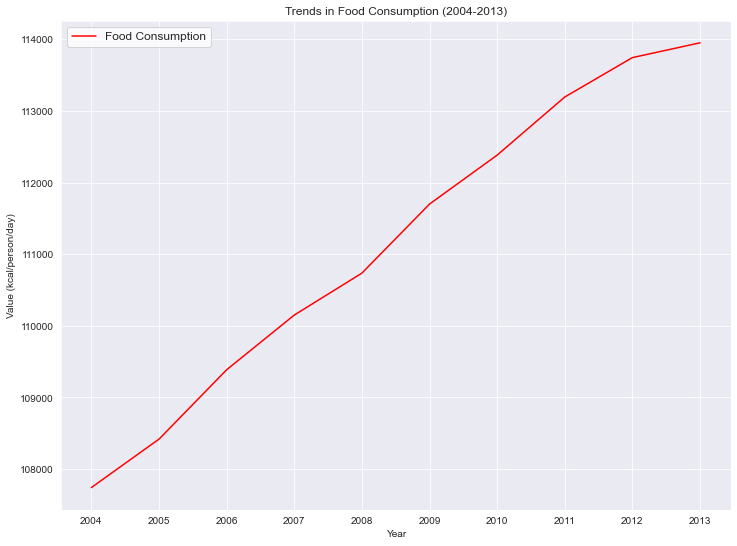

In [130]:
plt.figure(figsize=(12,9))
plt.plot(supply_data.groupby('Year').sum(), color='r', label='Food Consumption')
plt.legend(loc='upper left', fontsize='large', facecolor='white')
plt.title('Trends in Food Consumption (2004-2013)')
plt.xlabel('Year')
plt.ylabel('Value (kcal/person/day)')

**Viz 3: Comparison between Average Food Consumption and Average Food Production over the years**

Text(0.5, 0, 'Year')

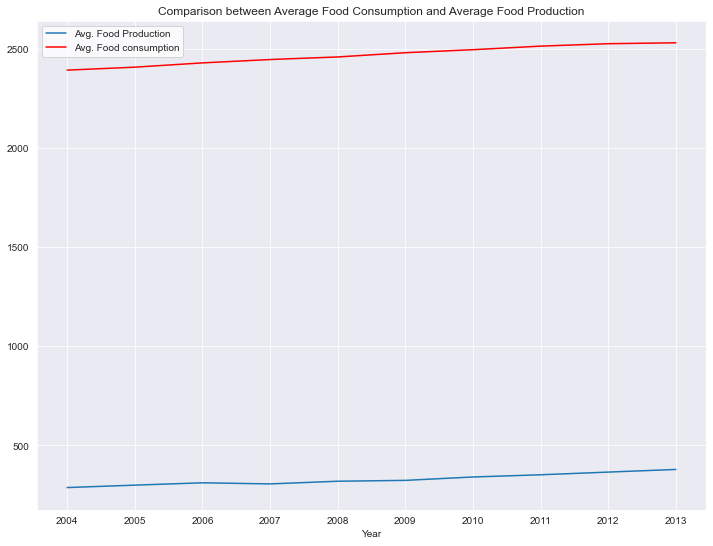

In [129]:
plt.figure(figsize=(12,9))
plt.plot(prod_data.groupby('Year').mean(), label='Avg. Food Production')
plt.plot(supply_data.groupby('Year').mean(), label='Avg. Food consumption', color='r')
plt.legend(facecolor='white')
plt.title('Comparison between Average Food Consumption and Average Food Production')
plt.xlabel('Year')

**Viz 4: Top 10 Food Producing Countries over the years**

In [117]:
#grouping production data by countries to get the top 10 producing countries
top_10_prod = prod_data.groupby('Country').mean().sort_values(by='Value', ascending=False).head(10)

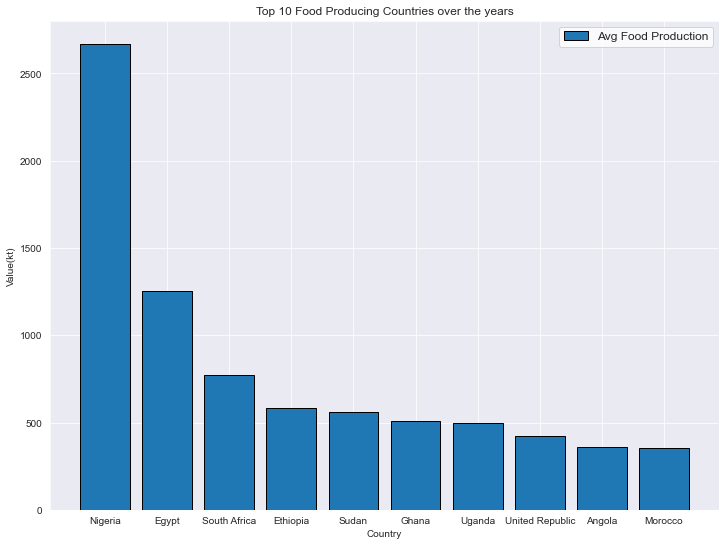

In [132]:
plt.figure(figsize=(12,9))
plt.bar(top_10_prod.index, top_10_prod['Value'], edgecolor='black', label = 'Avg Food Production')
plt.xlabel('Country')
plt.ylabel('Value(kt)')
plt.title('Top 10 Food Producing Countries over the years')
plt.legend(fontsize='large', facecolor='white')

**Viz 5: Comparison between Food production and Food consumption of the top 10 food producing countries**

In [107]:
#group production data by country to get the average food production for each country
prod_tot = prod_data.groupby('Country').mean().sort_values(by='Value', ascending=False)

In [108]:
#rename 'value' column to 'production'
prod_tot.rename(columns= {'Value':'Production'}, inplace=True)

In [109]:
#group supply data by country to get the average food consumption for each country
supply_total =supply_data.groupby('Country').mean().sort_values(by='Value', ascending=False)

In [110]:
#rename 'value' column to 'production'
supply_total.rename(columns= {'Value':'Supply'}, inplace=True)

In [111]:
#concatenate both average production and average supply datasets
country_total = pd.concat([prod_tot, supply_total], axis=1)

In [112]:
#the top ten food producing countries
top_ten = country_total.head(10)

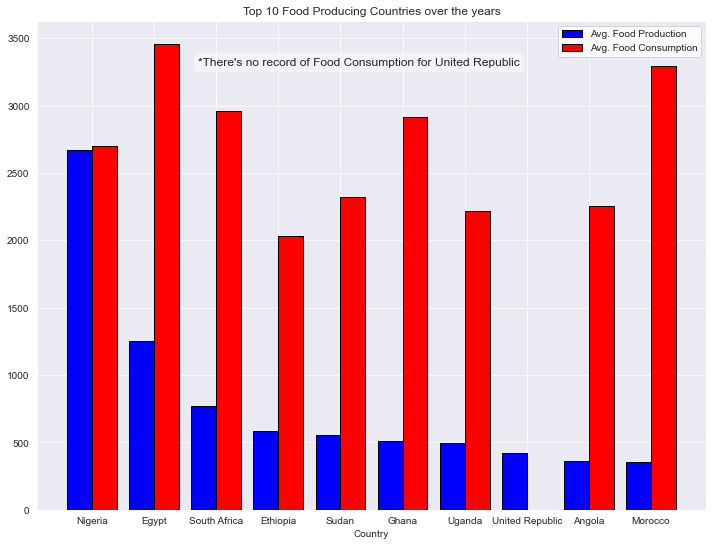

In [140]:
#plotting the bar chart
r= np.arange(10)
width = 0.4

plt.figure(figsize=(12,9))
plt.bar(r, top_ten['Production'], width = width, color='b', edgecolor='black', label='Avg. Food Production')
plt.bar(r + width, top_ten['Supply'], width = width, color='r', edgecolor='black', label='Avg. Food Consumption')

plt.text(x=1.5 + width, y=3300, s="*There's no record of Food Consumption for United Republic", fontsize=12,
         bbox=dict(facecolor='white', alpha=0.4))

plt.xlabel('Country')
plt.title('Top 10 Food Producing Countries over the years')

plt.xticks(r + width/2, top_ten.index.to_list())
plt.legend(facecolor='white')